# Traduction Anglais-Francais

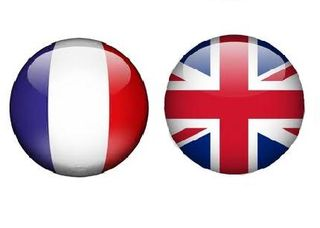

In [3]:
import torchaudio
import torch
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor, MarianMTModel, MarianTokenizer
import TTS
from TTS.api import TTS
import soundfile as sf

In [4]:
import os
import torch
import soundfile as sf
import numpy as np
from transformers import pipeline
from transformers import MarianMTModel, MarianTokenizer
from TTS.api import TTS

def load_audio(audio_file, target_rate=16000, max_duration=30):
    """
    Load audio file using soundfile with error handling.
    """
    try:
        # Verify file exists and is readable
        if not os.path.exists(audio_file):
            raise FileNotFoundError(f"Audio file not found: {audio_file}")
        
        # Read audio file
        audio_data, sample_rate = sf.read(audio_file)
        
        # Convert to mono if stereo
        if audio_data.ndim > 1:
            audio_data = audio_data.mean(axis=1)
        
        # Calculate duration
        duration = len(audio_data) / sample_rate
        
        # Trim if necessary
        if duration > max_duration:
            print(f"Audio is {duration:.2f} seconds long. Trimming to {max_duration} seconds.")
            max_samples = int(max_duration * sample_rate)
            audio_data = audio_data[:max_samples]
        
        return audio_data, sample_rate
    
    except Exception as e:
        print(f"Error loading audio: {e}")
        raise

def speech_to_text(audio_file):
    """
    Perform speech recognition with detailed error handling.
    """
    try:
        # Print detailed file information
        print(f"Attempting to process audio file: {audio_file}")
        print(f"File exists: {os.path.exists(audio_file)}")
        print(f"File size: {os.path.getsize(audio_file)} bytes")
        
        # Try loading audio first
        audio_data, sample_rate = load_audio(audio_file)
        
        # Save audio data to a temporary WAV file for processing
        import scipy.io.wavfile as wavfile
        temp_wav = "temp_audio.wav"
        wavfile.write(temp_wav, sample_rate, (audio_data * 32767).astype(np.int16))
        
        # Use Google Speech Recognition as a fallback
        try:
            import speech_recognition as sr
            
            recognizer = sr.Recognizer()
            with sr.AudioFile(temp_wav) as source:
                audio = recognizer.record(source)
            
            # Attempt Google Speech Recognition
            transcription = recognizer.recognize_google(audio)
            
            # Clean up temporary file
            os.remove(temp_wav)
            
            return transcription.strip()
        
        except ImportError:
            # If speech_recognition is not available, use alternative method
            print("SpeechRecognition library not available. Using alternative method.")
            
            # Attempt Hugging Face Whisper pipeline
            asr_pipeline = pipeline(
                "automatic-speech-recognition", 
                model="openai/whisper-tiny",  # Smallest model for faster processing
                device="cuda" if torch.cuda.is_available() else "cpu"
            )
            
            transcription = asr_pipeline(temp_wav)['text']
            
            # Clean up temporary file
            os.remove(temp_wav)
            
            return transcription.strip()
    
    except Exception as e:
        print(f"Comprehensive speech recognition error: {e}")
        raise

def translate_text(text, src_lang="en", tgt_lang="fr"):  # Change tgt_lang to 'fr'
    """
    Translate text using Marian translation model.
    """
    try:
        model_name = f"Helsinki-NLP/opus-mt-{src_lang}-{tgt_lang}"
        tokenizer = MarianTokenizer.from_pretrained(model_name)
        device = "cuda" if torch.cuda.is_available() else "cpu"
        model = MarianMTModel.from_pretrained(model_name).to(device)
        inputs = tokenizer(text, return_tensors="pt", padding=True).to(device)
        translated = model.generate(**inputs)
        translation = tokenizer.decode(translated[0], skip_special_tokens=True)
        return translation
    except Exception as e:
        print(f"Text translation error: {e}")
        raise

def text_to_speech(text, output_file, model_name="tts_models/multilingual/multi-dataset/your_tts", speaker='male-pt-3\n', language="fr-fr"):
    """
    Convert text to speech using TTS model.
    """
    try:
        tts = TTS(model_name)
        tts.tts_to_file(text=text, file_path=output_file, language=language, speaker=speaker)
    except Exception as e:
        print(f"Text to speech conversion error: {e}")
        raise

def process_audio_pipeline(audio_input, output_audio, target_language="fr-fr"):
    """
    Main pipeline for audio translation.
    """
    try:
        print("\nStep 1: Speech Recognition in progress...")
        text = speech_to_text(audio_input)
        print(f"Recognized text: {text}")
        
        print("\nStep 2: Text Translation in progress...")
        translated_text = translate_text(text, src_lang="en", tgt_lang="fr")
        print(f"Translated text: {translated_text}")
        
        print("\nStep 3: Text-to-Speech in progress...")
        text_to_speech(translated_text, output_audio, language=target_language)
        print(f"\nTranslated audio saved to {output_audio}")
    
    except Exception as e:
        print(f"Pipeline error: {e}")

# Detailed installation instructions
print("\nRequired Libraries:")
print("pip install torch torchaudio transformers TTS soundfile scipy")
print("Optional: pip install SpeechRecognition")

# Example usage
if __name__ == "__main__":
    audio_input = "english_audio.wav"  # Source audio file
    output_audio = "audio_traduit_francais.wav"  # Output audio file
    
    try:
        process_audio_pipeline(audio_input, output_audio, target_language="fr-fr")
    except Exception as e:
        print(f"Error in main execution: {e}")



Required Libraries:
pip install torch torchaudio transformers TTS soundfile scipy
Optional: pip install SpeechRecognition

Step 1: Speech Recognition in progress...
Attempting to process audio file: english_audio.wav
File exists: True
File size: 37860524 bytes
Audio is 788.76 seconds long. Trimming to 30 seconds.
Recognized text: welcome to today's Deep dive where we're going to be cracking open on my texts which is inside my head in French it's a collection of essays and poems by Yoni Fidel and this deep dive I think is going to take us on kind of a wild ride through human nature the quirks of perception and that Universal quest for meaning even when it feels like the universe is kind of playing a cosmic joke on us yeah but she kind of gets into he does yeah and he really doesn't hold back does he

Step 2: Text Translation in progress...
Translated text: Bienvenue à la plongée profonde d'aujourd'hui où nous allons craquer sur mes textes qui est à l'intérieur de ma tête en français c'

# Traduction En-Choice

In [2]:
import os
import torch
import soundfile as sf
import numpy as np
from transformers import pipeline
from transformers import MarianMTModel, MarianTokenizer
from TTS.api import TTS

def load_audio(audio_file, target_rate=16000, max_duration=30):
    """
    Load audio file using soundfile with error handling.
    """
    try:
        # Verify file exists and is readable
        if not os.path.exists(audio_file):
            raise FileNotFoundError(f"Audio file not found: {audio_file}")
        
        # Read audio file
        audio_data, sample_rate = sf.read(audio_file)
        
        # Convert to mono if stereo
        if audio_data.ndim > 1:
            audio_data = audio_data.mean(axis=1)
        
        # Calculate duration
        duration = len(audio_data) / sample_rate
        
        # Trim if necessary
        if duration > max_duration:
            print(f"Audio is {duration:.2f} seconds long. Trimming to {max_duration} seconds.")
            max_samples = int(max_duration * sample_rate)
            audio_data = audio_data[:max_samples]
        
        return audio_data, sample_rate
    
    except Exception as e:
        print(f"Error loading audio: {e}")
        raise

def speech_to_text(audio_file):
    """
    Perform speech recognition with detailed error handling.
    """
    try:
        # Print detailed file information
        print(f"Attempting to process audio file: {audio_file}")
        print(f"File exists: {os.path.exists(audio_file)}")
        print(f"File size: {os.path.getsize(audio_file)} bytes")
        
        # Try loading audio first
        audio_data, sample_rate = load_audio(audio_file)
        
        # Save audio data to a temporary WAV file for processing
        import scipy.io.wavfile as wavfile
        temp_wav = "temp_audio.wav"
        wavfile.write(temp_wav, sample_rate, (audio_data * 32767).astype(np.int16))
        
        # Use Google Speech Recognition as a fallback
        try:
            import speech_recognition as sr
            
            recognizer = sr.Recognizer()
            with sr.AudioFile(temp_wav) as source:
                audio = recognizer.record(source)
            
            # Attempt Google Speech Recognition
            transcription = recognizer.recognize_google(audio)
            
            # Clean up temporary file
            os.remove(temp_wav)
            
            return transcription.strip()
        
        except ImportError:
            # If speech_recognition is not available, use alternative method
            print("SpeechRecognition library not available. Using alternative method.")
            
            # Attempt Hugging Face Whisper pipeline
            asr_pipeline = pipeline(
                "automatic-speech-recognition", 
                model="openai/whisper-tiny",  # Smallest model for faster processing
                device="cuda" if torch.cuda.is_available() else "cpu"
            )
            
            transcription = asr_pipeline(temp_wav)['text']
            
            # Clean up temporary file
            os.remove(temp_wav)
            
            return transcription.strip()
    
    except Exception as e:
        print(f"Comprehensive speech recognition error: {e}")
        raise

def translate_text(text, src_lang="en", tgt_lang="fr"):
    """
    Translate text using Marian translation model.
    """
    try:
        model_name = f"Helsinki-NLP/opus-mt-{src_lang}-{tgt_lang}"
        tokenizer = MarianTokenizer.from_pretrained(model_name)
        device = "cuda" if torch.cuda.is_available() else "cpu"
        model = MarianMTModel.from_pretrained(model_name).to(device)
        inputs = tokenizer(text, return_tensors="pt", padding=True).to(device)
        translated = model.generate(**inputs)
        translation = tokenizer.decode(translated[0], skip_special_tokens=True)
        return translation
    except Exception as e:
        print(f"Text translation error: {e}")
        raise

def text_to_speech(text, output_file, model_name="tts_models/multilingual/multi-dataset/your_tts", speaker='male-pt-3\n', language="fr-fr"):
    """
    Convert text to speech using TTS model.
    """
    try:
        tts = TTS(model_name)
        tts.tts_to_file(text=text, file_path=output_file, language=language, speaker=speaker)
    except Exception as e:
        print(f"Text to speech conversion error: {e}")
        raise

def process_audio_pipeline(audio_input, output_audio, target_language):
    """
    Main pipeline for audio translation.
    """
    try:
        print("\nStep 1: Speech Recognition in progress...")
        text = speech_to_text(audio_input)
        print(f"Recognized text: {text}")
        
        print("\nStep 2: Text Translation in progress...")
        translated_text = translate_text(text, src_lang="en", tgt_lang=target_language)
        print(f"Translated text: {translated_text}")
        
        print("\nStep 3: Text-to-Speech in progress...")
        text_to_speech(translated_text, output_audio, language=target_language)
        print(f"\nTranslated audio saved to {output_audio}")
    
    except Exception as e:
        print(f"Pipeline error: {e}")

# Detailed installation instructions
print("\nRequired Libraries:")
print("pip install torch torchaudio transformers TTS soundfile scipy")
print("Optional: pip install SpeechRecognition")

# Example usage
if __name__ == "__main__":
    audio_input = "english_audio.wav"  # Source audio file
    output_audio = "audio_traduit.wav"  # Output audio file
    
    # Choose target language
    target_language = input("Choose target language (fr, es, de): ")
    
    try:
        process_audio_pipeline(audio_input, output_audio, target_language)
    except Exception as e:
        print(f"Error in main execution: {e}")



Required Libraries:
pip install torch torchaudio transformers TTS soundfile scipy
Optional: pip install SpeechRecognition



Step 1: Speech Recognition in progress...
Attempting to process audio file: english_audio.wav
File exists: True
File size: 37860524 bytes
Audio is 788.76 seconds long. Trimming to 30 seconds.
Recognized text: welcome to today's Deep dive where we're going to be cracking open on my texts which is inside my head in French it's a collection of essays and poems by Yoni Fidel and this deep dive I think is going to take us on kind of a wild ride through human nature the quirks of perception and that Universal quest for meaning even when it feels like the universe is kind of playing a cosmic joke on us yeah but she kind of gets into he does yeah and he really doesn't hold back does he

Step 2: Text Translation in progress...


c:\Users\user\OneDrive\Bureau\Translate_en_fr\myenv\Lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


Translated text: Bienvenue à la plongée profonde d'aujourd'hui où nous allons craquer sur mes textes qui est à l'intérieur de ma tête en français c'est une collection d'essais et de poèmes de Yoni Fidel et cette plongée profonde je pense va nous emmener sur une sorte de balade sauvage à travers la nature humaine les bizarreries de la perception et que la quête universelle du sens même quand il semble que l'univers est une sorte de jouer une blague cosmique sur nous oui mais elle en quelque sorte dans il fait oui et il ne tient vraiment pas en arrière il

Step 3: Text-to-Speech in progress...
 > tts_models/multilingual/multi-dataset/your_tts is already downloaded.
 > Using model: vits
 > Setting up Audio Processor...
 | > sample_rate:16000
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:0
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:None
 | > fft_size:1024
 | > power:None
 | > preemphasis:0.0
 | > griffin_lim_iters:None
 | > signal_n